In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Task 1 : Linear Regression

In [28]:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)

In [29]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [30]:
df.shape

(25, 2)

In [31]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [34]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


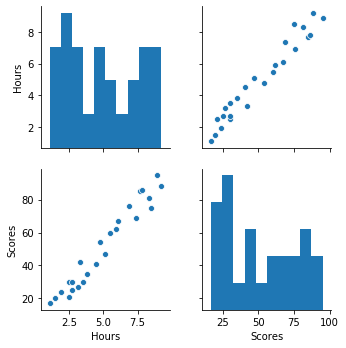

In [35]:
sns.pairplot(df)
plt.show()

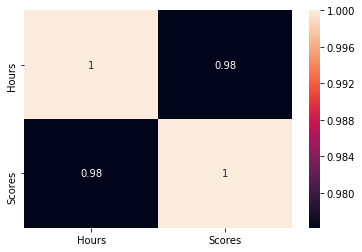

In [42]:
sns.heatmap(df.corr(),annot=True)
plt.show()

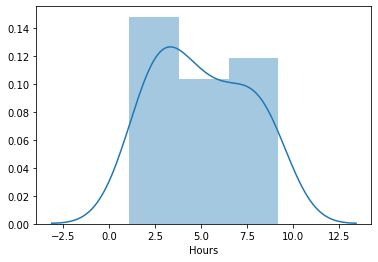

In [38]:
sns.distplot(df['Hours'])
plt.show()

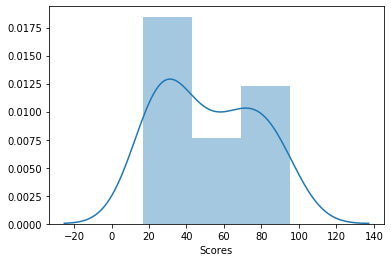

In [36]:
sns.distplot(df['Scores'])
plt.show()

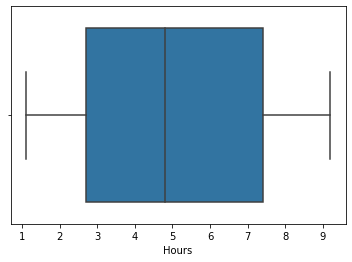

In [39]:
sns.boxplot(df['Hours'])
plt.show()

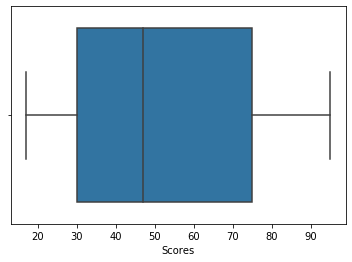

In [40]:
sns.boxplot(df['Scores'])
plt.show()

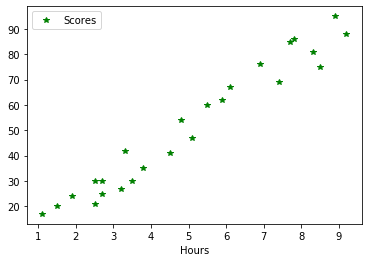

In [54]:
df.plot(x='Hours',y='Scores',style='*',color='Green')
plt.show()

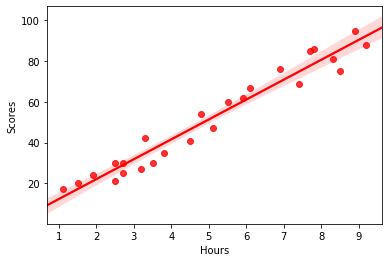

In [45]:
sns.regplot(df['Hours'],df['Scores'],color='Red')
plt.show()

# Model Building

In [11]:
from sklearn.model_selection import train_test_split  

In [12]:
from sklearn.linear_model import LinearRegression  

In [13]:
X=df.iloc[:, :-1].values  
y=df.iloc[:, 1].values  

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
ypred=model.predict(X_test)

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [20]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, ypred)) 
print('Mean Square Error:', 
      metrics.mean_squared_error(y_test, ypred)) 
print('Mean Squared Log Error:', 
      metrics.mean_squared_log_error(y_test, ypred)) 

Mean Absolute Error: 4.419727808027652
Mean Square Error: 22.96509721270043
Mean Squared Log Error: 0.015777062076746614


# Task 2: Unsupervised Learning

In [56]:
#Loading the Iris Dataset (which is inbuilt)
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [57]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
iris_df.shape

(150, 4)

In [59]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [60]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [61]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

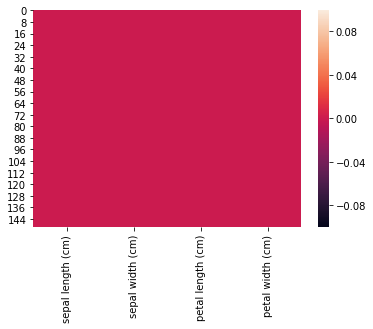

In [62]:
sns.heatmap(iris_df.isnull())
plt.show()

In [66]:
iris_df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


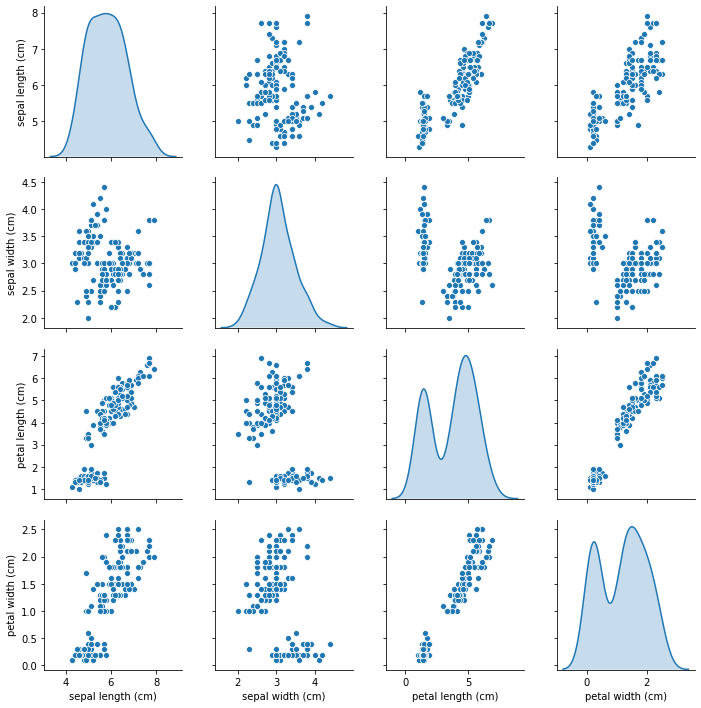

In [71]:
sns.pairplot(iris_df,diag_kind='kde')
plt.show()

# Clustering

In [67]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [74]:
df_scaled=iris_df.apply(zscore)

In [75]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.092547
4,5,90.859883
5,6,80.722925
6,7,71.830259
7,8,62.514940
8,9,54.806017
9,10,47.537027


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

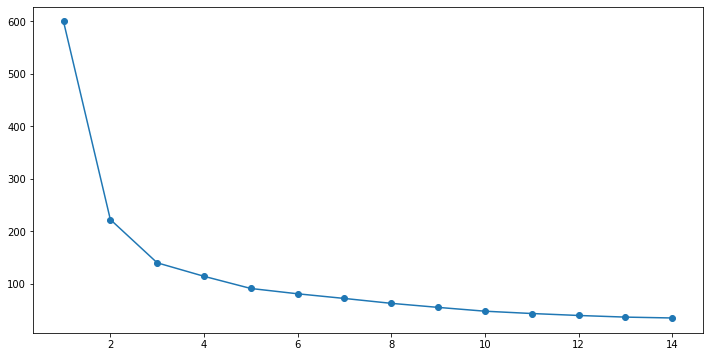

In [77]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [78]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [79]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [80]:
centroids=kmeans.cluster_centers_

In [81]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [82]:
centroid_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.050220,-0.883376,0.347738,0.281527
1,-1.014579,0.853263,-1.304987,-1.254893
2,1.135970,0.088422,0.996155,1.017526


In [83]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [84]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [85]:
iris_clusters = iris_df_labeled.groupby(['labels'])

df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)


In [86]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [87]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [88]:
tot_I=I0+I1+I2
print(tot_I)

139.82049635974974


In [89]:
kmeans.inertia_

139.82049635974977

In [91]:
finaldf=pd.concat([df0,df1,df2])
finaldf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
53,-0.416010,-1.743357,0.137547,0.132510,0
54,0.795669,-0.592373,0.478571,0.395774,0
55,-0.173674,-0.592373,0.421734,0.132510,0
57,-1.143017,-1.513160,-0.260315,-0.262387,0
58,0.916837,-0.362176,0.478571,0.132510,0


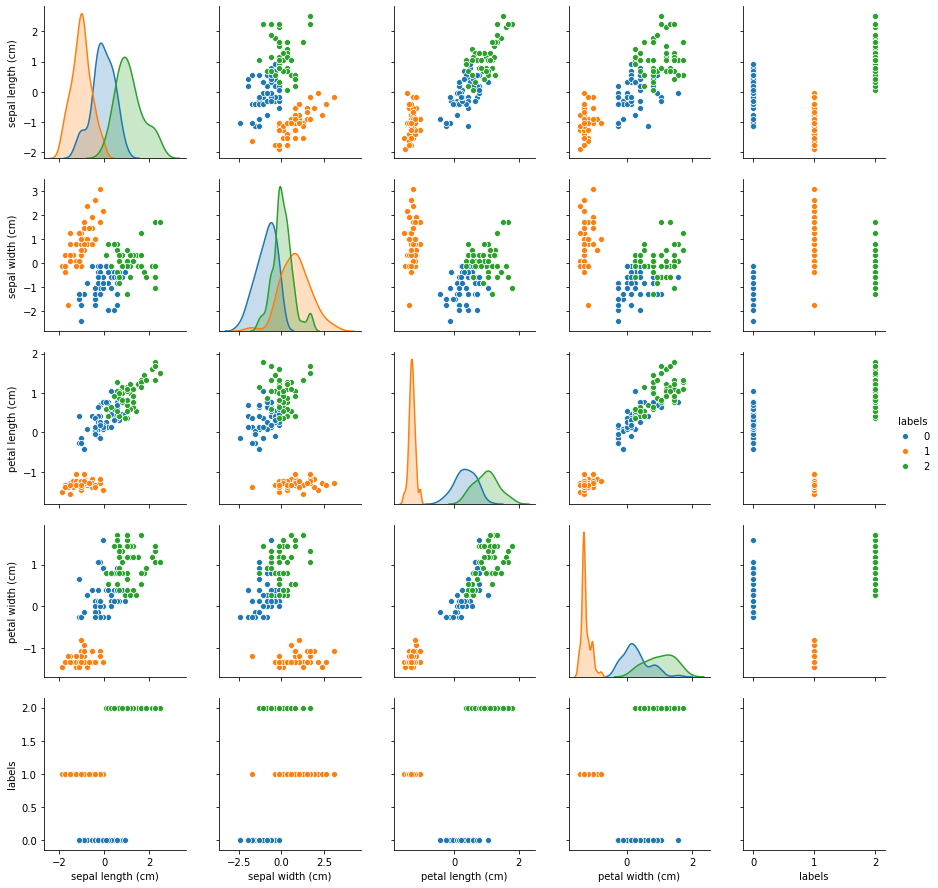

In [93]:
sns.pairplot(finaldf,diag_kind='kde',hue='labels')
plt.show()

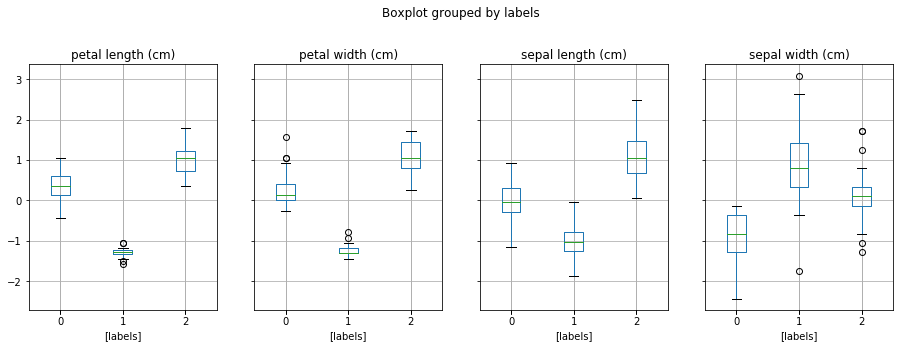

In [94]:
finaldf.boxplot(by='labels',layout=(2,4),figsize=(15,10))
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


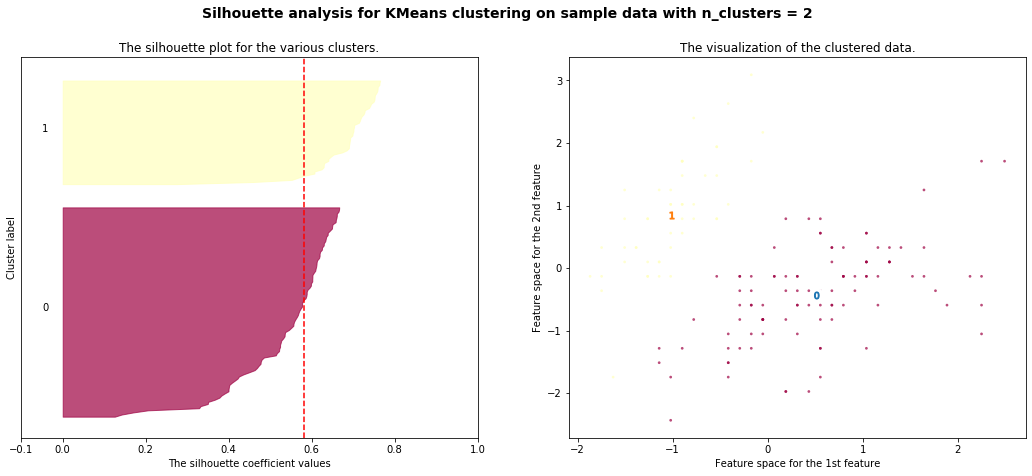

For n_clusters = 3 The average silhouette_score is : 0.45994823920518646


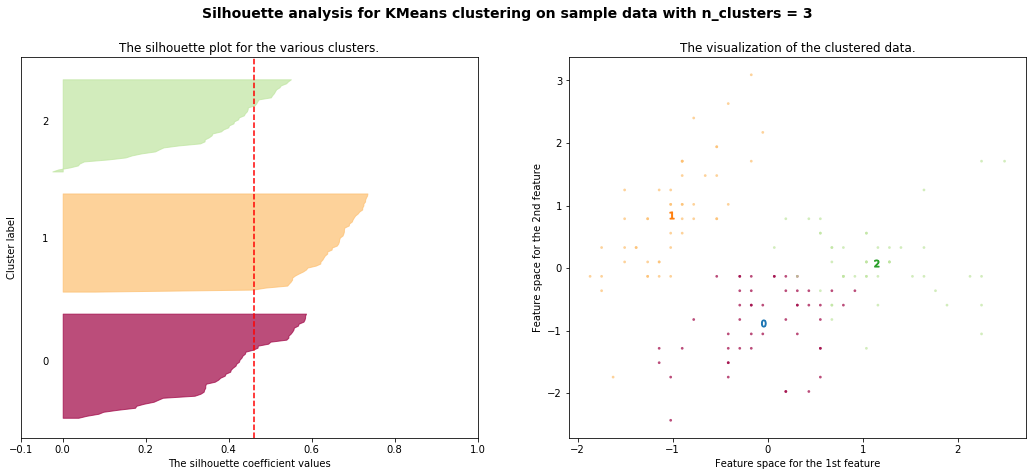

For n_clusters = 4 The average silhouette_score is : 0.41889233981710045


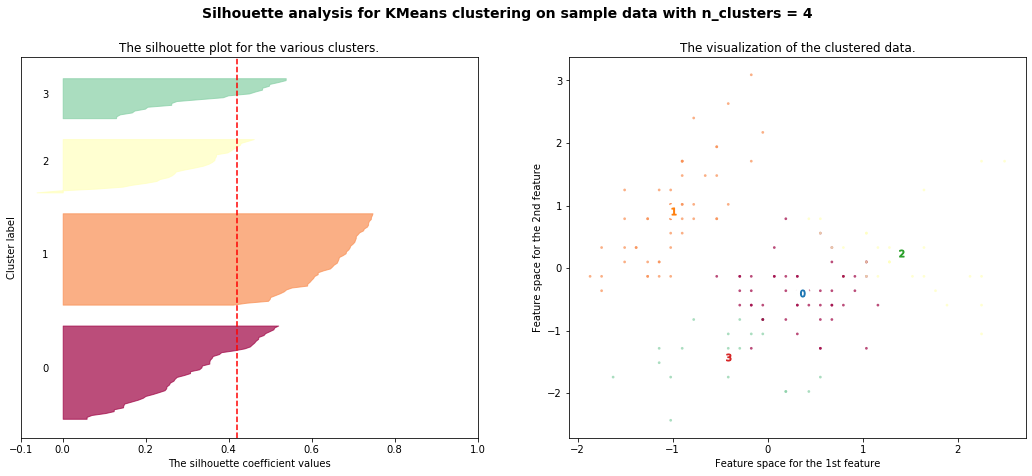

For n_clusters = 5 The average silhouette_score is : 0.34551099599809476


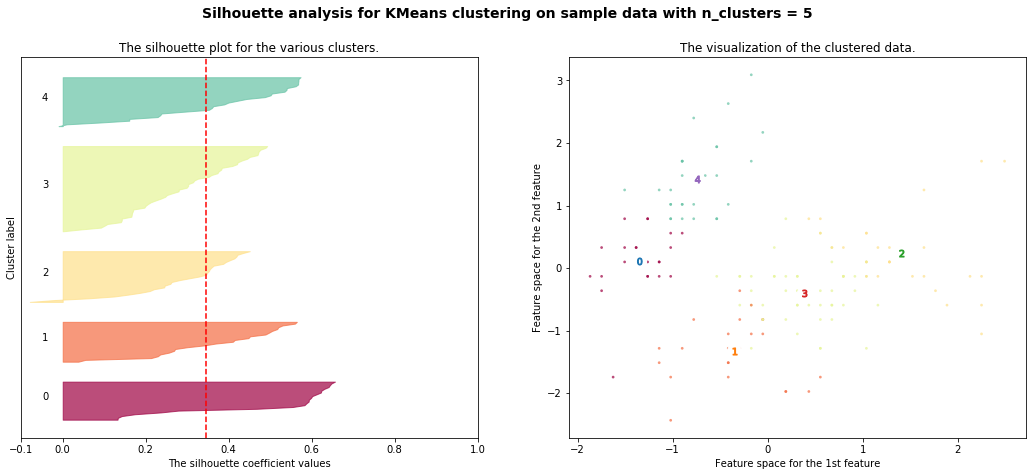

For n_clusters = 6 The average silhouette_score is : 0.329545018826696


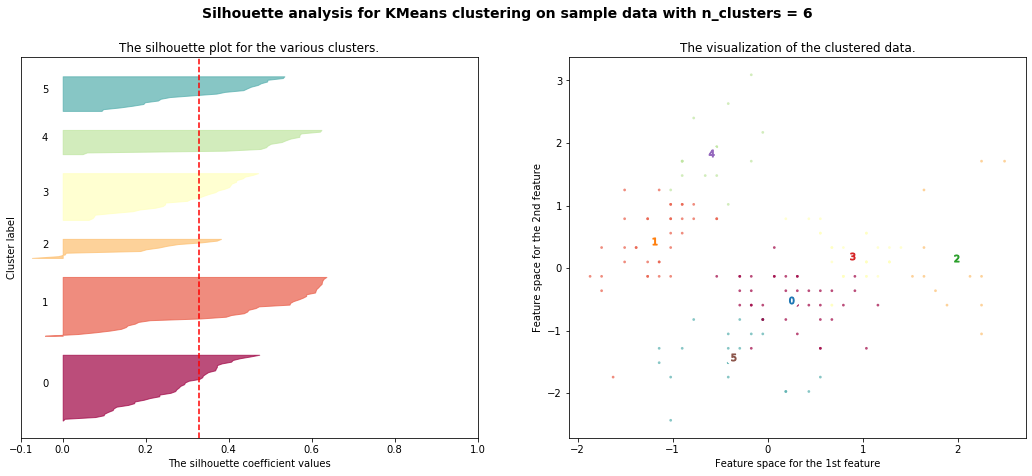

In [107]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [96]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [97]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

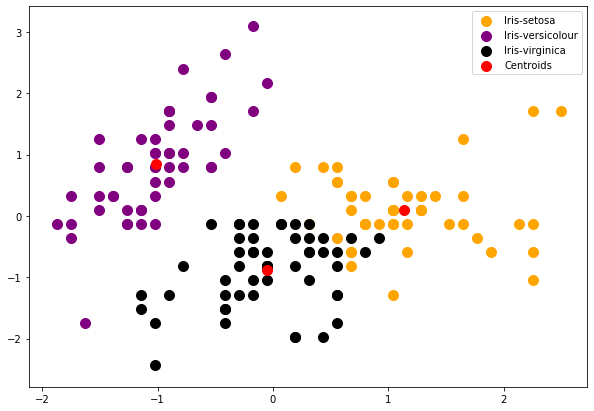

In [106]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()